In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
from PIL import Image
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
# Path to the folder containing the images
folder_path = "/content/drive/MyDrive/US dataset/Original/benign"

# Path to save the composite images
save_path = "/content/drive/MyDrive/US dataset/Original/Overlayed/benign"

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png") and "_mask" not in filename:  # Select only the images, not the masks
        image_path = os.path.join(folder_path, filename)
        mask_path_1 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask.png")  # Construct the first mask path
        mask_path_2 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask_1.png")  # Construct the second mask path
        mask_path_3 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask_2.png")  # Construct the third mask path

        # Open the background image
        background = Image.open(image_path)

        # Initialize the overlay image as None
        overlay_final = None

        # Check if the first mask exists
        if os.path.exists(mask_path_1):
            # Open the first overlay image
            overlay_1 = Image.open(mask_path_1)

            # Resize the first overlay image to fit the background image
            overlay_resized_1 = overlay_1.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_1.mode:
                overlay_resized_1 = overlay_resized_1.convert(background.mode)

            overlay_final = overlay_resized_1

        # Check if the second mask exists
        if os.path.exists(mask_path_2):
            # Open the second overlay image
            overlay_2 = Image.open(mask_path_2)

            # Resize the second overlay image to fit the background image
            overlay_resized_2 = overlay_2.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_2.mode:
                overlay_resized_2 = overlay_resized_2.convert(background.mode)

            # If the first overlay image exists, blend both overlay images
            if overlay_final:
                overlay_final = Image.blend(overlay_final, overlay_resized_2, 0.5)
            else:
                overlay_final = overlay_resized_2

        # Check if the third mask exists
        if os.path.exists(mask_path_3):
            # Open the third overlay image
            overlay_3 = Image.open(mask_path_3)

            # Resize the third overlay image to fit the background image
            overlay_resized_3 = overlay_3.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_3.mode:
                overlay_resized_3 = overlay_resized_3.convert(background.mode)

            # If any previous overlay image exists, blend the third overlay image
            if overlay_final:
                overlay_final = Image.blend(overlay_final, overlay_resized_3, 0.5)
            else:
                overlay_final = overlay_resized_3

        if overlay_final:
            # Create a composite image by blending the images
            blended = Image.blend(background, overlay_final, 0.5)

            # Save the composite image in the specified folder
            save_name = f"overlayed_{filename}"
            save_path_full = os.path.join(save_path, save_name)
            blended.save(save_path_full)  # Adjust the save file name as needed

            # Optionally, show the composite image
            # blended.show()
        else:
            print(f"No masks found for {filename}.")

In [5]:
# Path to the folder containing the images
folder_path = "/content/drive/MyDrive/US dataset/Original/malignant"

# Path to save the composite images
save_path = "/content/drive/MyDrive/US dataset/Original/Overlayed/malignant"

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png") and "_mask" not in filename:  # Select only the images, not the masks
        image_path = os.path.join(folder_path, filename)
        mask_path_1 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask.png")  # Construct the first mask path
        mask_path_2 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask_1.png")  # Construct the second mask path
        mask_path_3 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask_2.png")  # Construct the third mask path

        # Open the background image
        background = Image.open(image_path)

        # Initialize the overlay image as None
        overlay_final = None

        # Check if the first mask exists
        if os.path.exists(mask_path_1):
            # Open the first overlay image
            overlay_1 = Image.open(mask_path_1)

            # Resize the first overlay image to fit the background image
            overlay_resized_1 = overlay_1.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_1.mode:
                overlay_resized_1 = overlay_resized_1.convert(background.mode)

            overlay_final = overlay_resized_1

        # Check if the second mask exists
        if os.path.exists(mask_path_2):
            # Open the second overlay image
            overlay_2 = Image.open(mask_path_2)

            # Resize the second overlay image to fit the background image
            overlay_resized_2 = overlay_2.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_2.mode:
                overlay_resized_2 = overlay_resized_2.convert(background.mode)

            # If the first overlay image exists, blend both overlay images
            if overlay_final:
                overlay_final = Image.blend(overlay_final, overlay_resized_2, 0.5)
            else:
                overlay_final = overlay_resized_2

        # Check if the third mask exists
        if os.path.exists(mask_path_3):
            # Open the third overlay image
            overlay_3 = Image.open(mask_path_3)

            # Resize the third overlay image to fit the background image
            overlay_resized_3 = overlay_3.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_3.mode:
                overlay_resized_3 = overlay_resized_3.convert(background.mode)

            # If any previous overlay image exists, blend the third overlay image
            if overlay_final:
                overlay_final = Image.blend(overlay_final, overlay_resized_3, 0.5)
            else:
                overlay_final = overlay_resized_3

        if overlay_final:
            # Create a composite image by blending the images
            blended = Image.blend(background, overlay_final, 0.5)

            # Save the composite image in the specified folder
            save_name = f"overlayed_{filename}"
            save_path_full = os.path.join(save_path, save_name)
            blended.save(save_path_full)  # Adjust the save file name as needed

            # Optionally, show the composite image
            # blended.show()
        else:
            print(f"No masks found for {filename}.")

In [6]:
# Path to the folder containing the images
folder_path = "/content/drive/MyDrive/US dataset/Original/normal"

# Path to save the composite images
save_path = "/content/drive/MyDrive/US dataset/Original/Overlayed/normal"

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png") and "_mask" not in filename:  # Select only the images, not the masks
        image_path = os.path.join(folder_path, filename)
        mask_path_1 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask.png")  # Construct the first mask path
        mask_path_2 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask_1.png")  # Construct the second mask path
        mask_path_3 = os.path.join(folder_path, f"{filename.split('.')[0]}_mask_2.png")  # Construct the third mask path

        # Open the background image
        background = Image.open(image_path)

        # Initialize the overlay image as None
        overlay_final = None

        # Check if the first mask exists
        if os.path.exists(mask_path_1):
            # Open the first overlay image
            overlay_1 = Image.open(mask_path_1)

            # Resize the first overlay image to fit the background image
            overlay_resized_1 = overlay_1.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_1.mode:
                overlay_resized_1 = overlay_resized_1.convert(background.mode)

            overlay_final = overlay_resized_1

        # Check if the second mask exists
        if os.path.exists(mask_path_2):
            # Open the second overlay image
            overlay_2 = Image.open(mask_path_2)

            # Resize the second overlay image to fit the background image
            overlay_resized_2 = overlay_2.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_2.mode:
                overlay_resized_2 = overlay_resized_2.convert(background.mode)

            # If the first overlay image exists, blend both overlay images
            if overlay_final:
                overlay_final = Image.blend(overlay_final, overlay_resized_2, 0.5)
            else:
                overlay_final = overlay_resized_2

        # Check if the third mask exists
        if os.path.exists(mask_path_3):
            # Open the third overlay image
            overlay_3 = Image.open(mask_path_3)

            # Resize the third overlay image to fit the background image
            overlay_resized_3 = overlay_3.resize(background.size, Image.LANCZOS)

            # Ensure the mode is compatible
            if background.mode != overlay_resized_3.mode:
                overlay_resized_3 = overlay_resized_3.convert(background.mode)

            # If any previous overlay image exists, blend the third overlay image
            if overlay_final:
                overlay_final = Image.blend(overlay_final, overlay_resized_3, 0.5)
            else:
                overlay_final = overlay_resized_3

        if overlay_final:
            # Create a composite image by blending the images
            blended = Image.blend(background, overlay_final, 0.5)

            # Save the composite image in the specified folder
            save_name = f"overlayed_{filename}"
            save_path_full = os.path.join(save_path, save_name)
            blended.save(save_path_full)  # Adjust the save file name as needed

            # Optionally, show the composite image
            # blended.show()
        else:
            print(f"No masks found for {filename}.")

In [49]:
# Define the parent folder containing the images
parent_folder_path = "/content/drive/MyDrive/US dataset/Original/Overlayed"

# Lists to store the data
images = []
labels = []

# Define the desired dimensions
desired_width = 64
desired_height = 64

# Iterate through the parent folder
for folder in os.listdir(parent_folder_path):
    folder_path = os.path.join(parent_folder_path, folder)
    if not os.path.isdir(folder_path):
        continue

    label = folder

    # Iterate through images in the current folder
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)

        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Resize the image to the desired dimensions
        image = cv2.resize(image, (desired_width, desired_height))

        # Append the features and label to the lists
        images.append(image.flatten())
        labels.append(label)

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

In [51]:
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [52]:
# Calculate the accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7564102564102564
Classification Report:
              precision    recall  f1-score   support

      benign       0.74      0.89      0.81        87
   malignant       0.82      0.43      0.56        42
      normal       0.77      0.85      0.81        27

    accuracy                           0.76       156
   macro avg       0.78      0.72      0.73       156
weighted avg       0.77      0.76      0.74       156



In [53]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion


array([[77,  4,  6],
       [23, 18,  1],
       [ 4,  0, 23]])

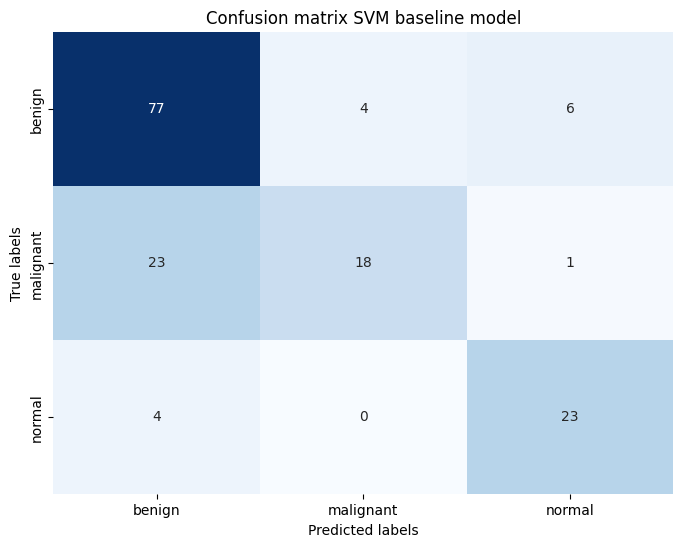

In [63]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
categories = {'benign': 0, 'malignant': 1, 'normal': 2}
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=categories, yticklabels=categories)
plt.title('Confusion matrix SVM baseline model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()